In [1]:
# Import the dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

580

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
# Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zlitan
Processing Record 2 of Set 1 | havoysund
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | saint anthony
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | grootfontein
Processing Record 7 of Set 1 | chapais
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | lasa
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | miraflores
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | umm jarr
City not found. Skipping...
Processing 

Processing Record 37 of Set 4 | siavonga
Processing Record 38 of Set 4 | karonga
Processing Record 39 of Set 4 | makokou
Processing Record 40 of Set 4 | sao filipe
Processing Record 41 of Set 4 | saint-paul
Processing Record 42 of Set 4 | taltal
Processing Record 43 of Set 4 | mikhaylovskoye
Processing Record 44 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 4 | comodoro rivadavia
Processing Record 46 of Set 4 | antalaha
Processing Record 47 of Set 4 | maraa
Processing Record 48 of Set 4 | great yarmouth
Processing Record 49 of Set 4 | laguna
Processing Record 50 of Set 4 | bama
Processing Record 1 of Set 5 | waddan
Processing Record 2 of Set 5 | tucupita
Processing Record 3 of Set 5 | castro
Processing Record 4 of Set 5 | isla mujeres
Processing Record 5 of Set 5 | marcona
City not found. Skipping...
Processing Record 6 of Set 5 | yaguajay
Processing Record 7 of Set 5 | berbera
Processing Record 8 of Set 5 | cleethorpes
Processing Record 9 of Set 5 | p

Processing Record 29 of Set 8 | kibre mengist
Processing Record 30 of Set 8 | jiddah
City not found. Skipping...
Processing Record 31 of Set 8 | praia
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | balkhash
Processing Record 34 of Set 8 | dom pedrito
Processing Record 35 of Set 8 | iquique
Processing Record 36 of Set 8 | mendoza
Processing Record 37 of Set 8 | sao geraldo do araguaia
Processing Record 38 of Set 8 | talant
Processing Record 39 of Set 8 | ergani
Processing Record 40 of Set 8 | puerto del rosario
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | malard
Processing Record 44 of Set 8 | araouane
Processing Record 45 of Set 8 | ozinki
Processing Record 46 of Set 8 | umm kaddadah
Processing Record 47 of Set 8 | zavetnoye
Processing Record 48 of Set 8 | jibuti
Processing Record 49 of Set 8 | tigre
Processing Record 50 of Set 8 | krasnoselkup
Processing Record 1 of Set 9 | novomykolayiv

Processing Record 18 of Set 12 | islamkot
Processing Record 19 of Set 12 | geraldton
Processing Record 20 of Set 12 | eirunepe
Processing Record 21 of Set 12 | safaga
Processing Record 22 of Set 12 | trincomalee
Processing Record 23 of Set 12 | surt
Processing Record 24 of Set 12 | somerset
Processing Record 25 of Set 12 | qostanay
Processing Record 26 of Set 12 | salaga
Processing Record 27 of Set 12 | cozumel
Processing Record 28 of Set 12 | pedernales
Processing Record 29 of Set 12 | hukuntsi
Processing Record 30 of Set 12 | statesville
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
len(city_data)

542

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zlitan,32.4674,14.5687,70.95,66,16,11.03,LY,2021-10-20 02:26:45
1,Havoysund,70.9963,24.6622,25.68,73,46,8.70,NO,2021-10-20 02:23:37
2,Ribeira Grande,38.5167,-28.7000,69.40,67,7,9.17,PT,2021-10-20 02:26:45
3,Saint Anthony,45.0205,-93.2180,66.15,69,1,1.99,US,2021-10-20 02:26:46
4,Mar Del Plata,-38.0023,-57.5575,58.08,51,0,1.99,AR,2021-10-20 02:26:46
5,Grootfontein,-19.5667,18.1167,67.57,52,98,4.61,NA,2021-10-20 02:26:46
6,Chapais,49.7834,-74.8492,40.78,96,100,5.91,CA,2021-10-20 02:26:46
7,Pangnirtung,66.1451,-65.7125,34.61,70,100,1.03,CA,2021-10-20 02:26:47
8,Hermanus,-34.4187,19.2345,58.89,91,4,13.11,ZA,2021-10-20 02:26:47
9,Salalah,17.0151,54.0924,75.29,83,0,3.44,OM,2021-10-20 02:22:41


In [14]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zlitan,LY,2021-10-20 02:26:45,32.4674,14.5687,70.95,66,16,11.03
1,Havoysund,NO,2021-10-20 02:23:37,70.9963,24.6622,25.68,73,46,8.70
2,Ribeira Grande,PT,2021-10-20 02:26:45,38.5167,-28.7000,69.40,67,7,9.17
3,Saint Anthony,US,2021-10-20 02:26:46,45.0205,-93.2180,66.15,69,1,1.99
4,Mar Del Plata,AR,2021-10-20 02:26:46,-38.0023,-57.5575,58.08,51,0,1.99


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

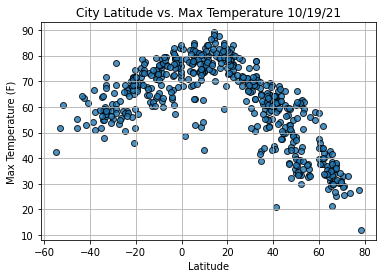

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

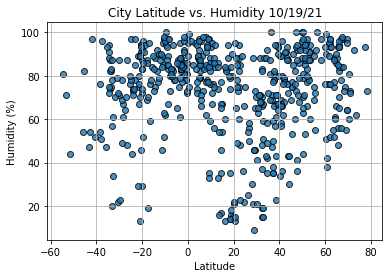

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

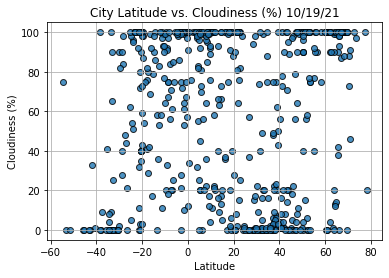

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

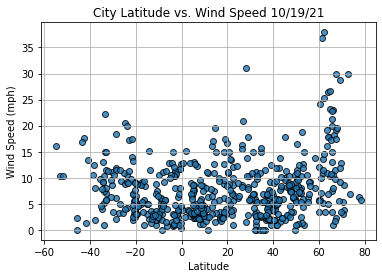

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()